In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "../src/data/"
a507 = pd.read_csv(path + 'A507.csv')
a501 = pd.read_csv(path + 'A501.csv')
a502 = pd.read_csv(path + 'A502.csv')
a503 = pd.read_csv(path + 'A503.csv')
a505 = pd.read_csv(path + 'A505.csv')
a506 = pd.read_csv(path + 'A506.csv')
a508 = pd.read_csv(path + 'A508.csv')
a509 = pd.read_csv(path + 'A509.csv')
hall = pd.read_csv(path + 'Hall.csv')

In [16]:
def boxplot(csv):
    ap = list(csv.ap_id.unique())
    rssi = [csv.loc[csv.ap_id == i].rssi for i in ap]
    plt.figure(figsize=(14,8))
    plt.boxplot(rssi);
    plt.xticks(range(1,len(ap)+1),ap, rotation=90);
    plt.title(str(csv.room_id[0]))
    plt.show();

In [4]:
def histograms(csv1, csv2):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].hist(csv1.rssi)
    ax[0].set_title(str(csv1.room_id[0]))
    ax[1].hist(csv2.rssi)
    ax[1].set_title(str(csv2.room_id[0]))
    ax[0].grid()
    ax[1].grid()
    plt.tight_layout()
    plt.show();

In [5]:
def grouped_histogram(csv1, csv2, csv3, csv4):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    ax1.hist(csv1.rssi, color= 'blue', alpha=0.7, label=str(csv1.room_id[0]))
    ax1.hist(csv2.rssi, color= 'red', alpha=0.7, label=str(csv2.room_id[0]))
    ax1.set_title(f'{str(csv1.room_id[0])} and {str(csv2.room_id[0])}')
    ax1.grid()
    ax1.legend(loc='best')
    ax2.hist(csv3.rssi, color= 'blue', alpha=0.7, label=str(csv3.room_id[0]))
    ax2.hist(csv4.rssi, color= 'red', alpha=0.7, label=str(csv4.room_id[0]))
    ax2.set_title(f'{str(csv3.room_id[0])} and {str(csv4.room_id[0])}')
    ax2.grid()
    ax2.legend(loc='best')
    plt.tight_layout()
    plt.show();

In [6]:
def check_unique_ap(this, other):
    """ Checks for differences in Access Points between given rooms """
    first = set(this.ap_id.unique())
    second = set(other.ap_id.unique())
    diff1 = list(first.difference(second))
    diff2 = list(second.difference(first))
    if not diff1 and not diff2:
        print(f'There is not differences in Access Points between {this.room_id[0]} and {other.room_id[0]}')
    else:
        print(f'AP in {this.room_id[0]} which are not in {other.room_id[0]}:\n {diff1}\n')
        print(f'AP in {other.room_id[0]} which are not in {this.room_id[0]}:\n {diff2}')

In [8]:
def ap_num():
    dic = {}
    for csv in [a507, a501, a502, a503, a505, a506, a508, a509, hall]:
        print(f'{str(csv.room_id[0])} - There is {len(csv.ap_id.unique())} Access points.')
        dic[str(csv.room_id[0])] = len(csv.ap_id.unique())
    max_ap = max(dic, key=dic.get)
    min_ap = min(dic, key=dic.get)
    print(f'\n{max_ap} has the most Access Points ({dic[max_ap]}).\n{min_ap} has the least Access Points ({dic[min_ap]}).')

In [32]:
def count_ap_data(csv):
    number = csv.ap_id.value_counts()
    print(number)

In [88]:
def drop_least_ap(csv):
    number = csv.ap_id.value_counts()
    ap_to_drop = number[number < 50].index
    idx = csv[csv['ap_id'].isin(list(ap_to_drop))].index
    droped_csv = csv.drop(idx).reset_index(drop=True)
    return droped_csv   

In [89]:
def smooth_signal(csv_list):
    for csv in csv_list:
        csv.rssi = csv.rssi.ewm(halflife=100, min_periods=1).mean()

In [9]:
ap_num()

A507 - There is 17 Access points.
A501 - There is 25 Access points.
A502 - There is 19 Access points.
A503 - There is 13 Access points.
A505 - There is 18 Access points.
A506 - There is 19 Access points.
A508 - There is 16 Access points.
A509 - There is 19 Access points.
Hodnik - There is 15 Access points.

A501 has the most Access Points (25).
A503 has the least Access Points (13).


In [10]:
check_unique_ap(a509, a508)

AP in A509 which are not in A508:
 ['KESP252', 'Marko', 'LaBACS']

AP in A508 which are not in A509:
 []


# Raw RSSI data histograms

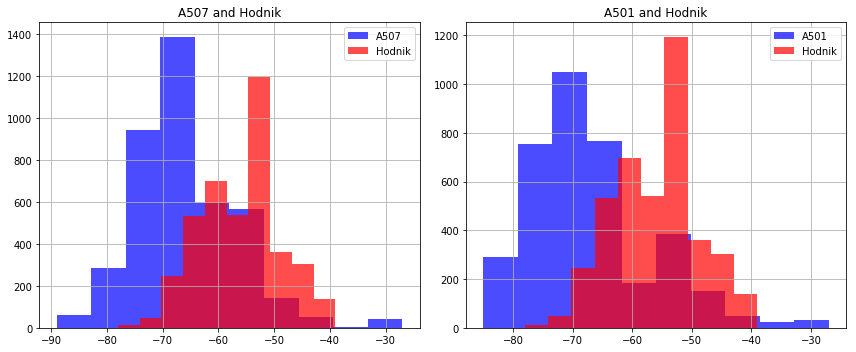

In [18]:
grouped_histogram(a507, hall, a501, hall)

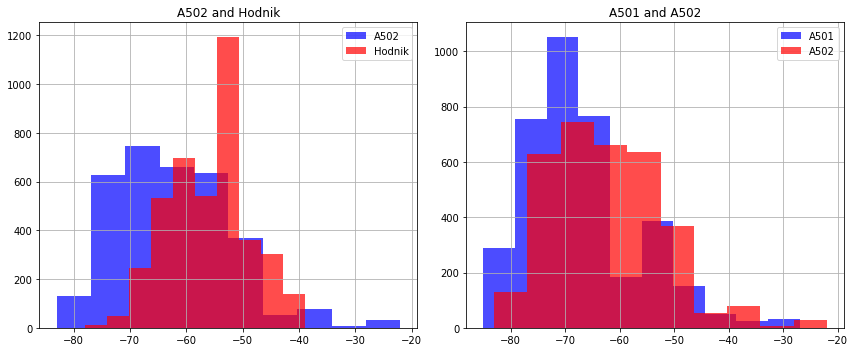

In [18]:
grouped_histogram(a502, hall, a501, a502)

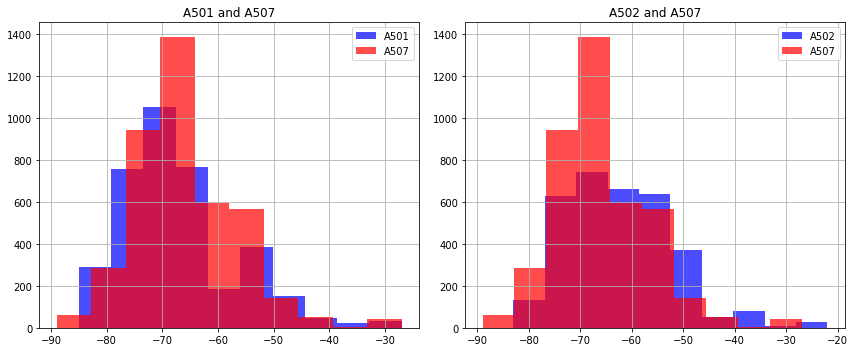

In [19]:
grouped_histogram(a501, a507, a502, a507)

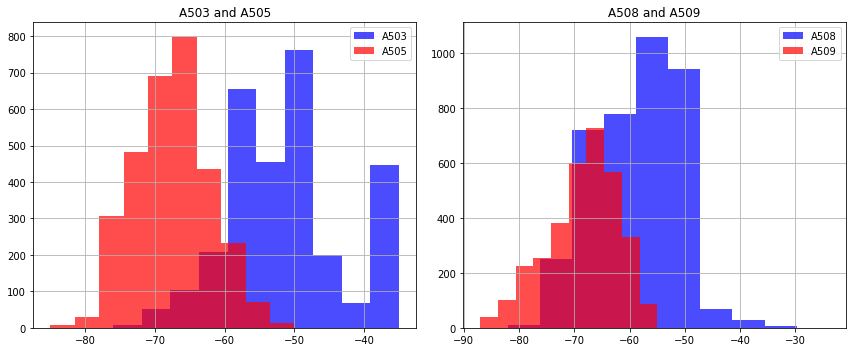

In [14]:
grouped_histogram(a503, a505, a508, a509)

# Boxplots

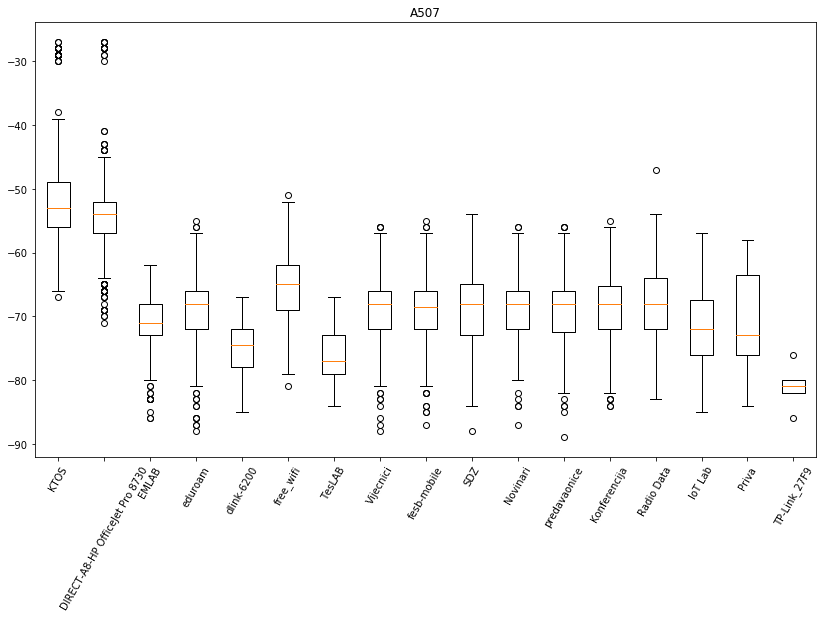

In [36]:
boxplot(a507)

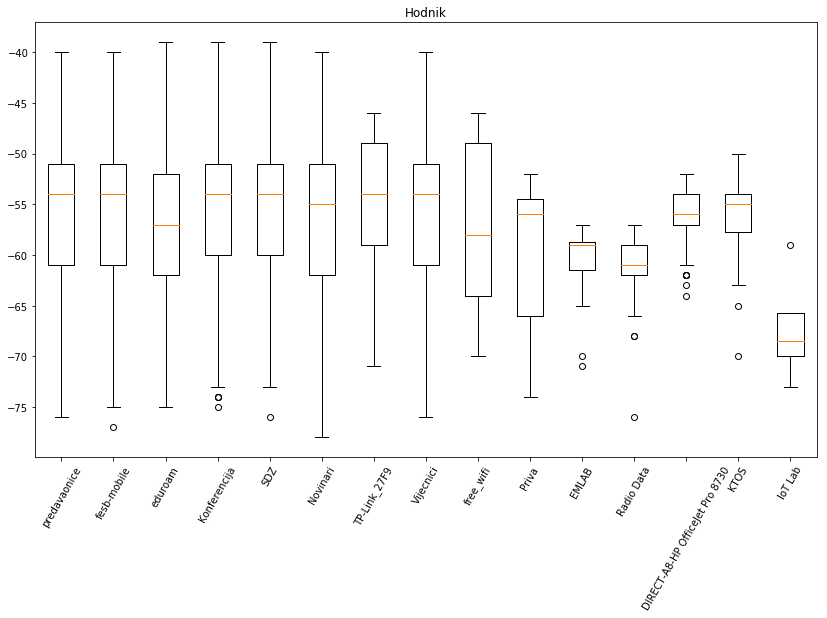

In [12]:
boxplot(hall)

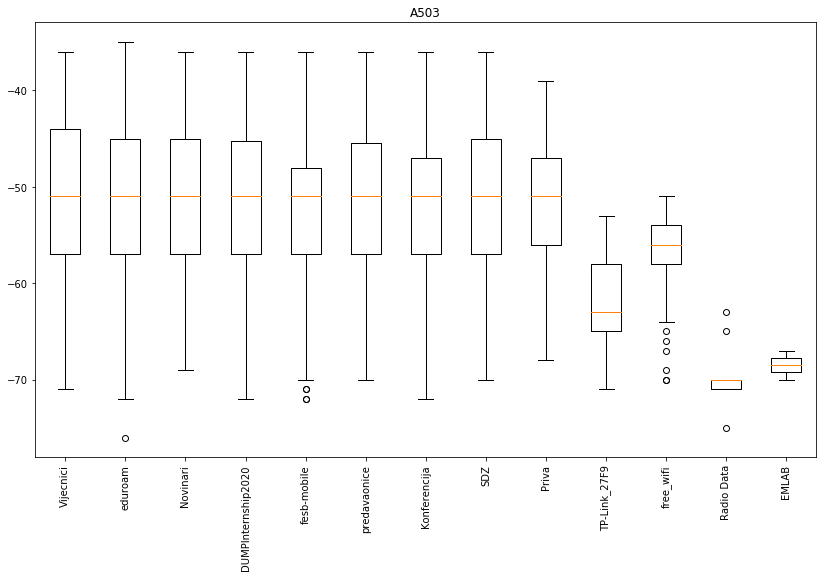

In [17]:
boxplot(a503)

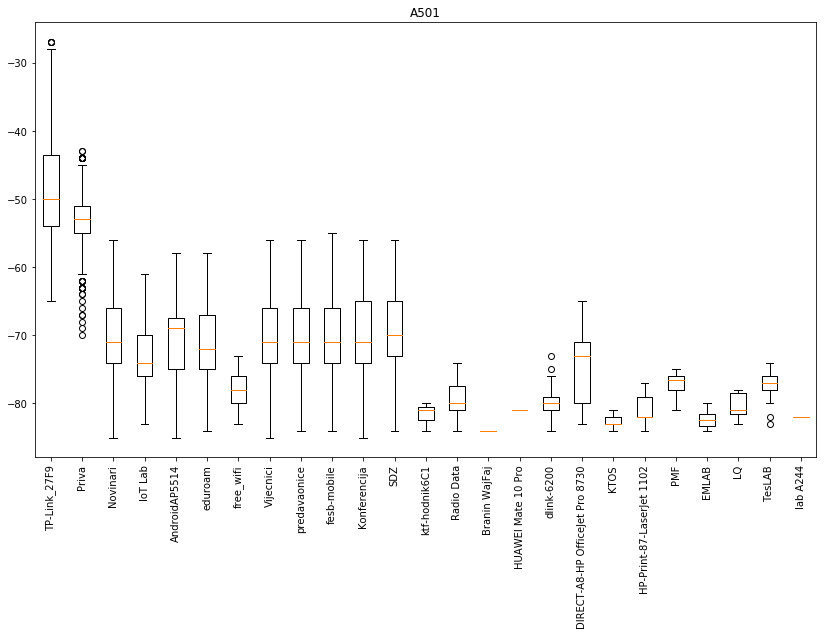

In [18]:
boxplot(a501)

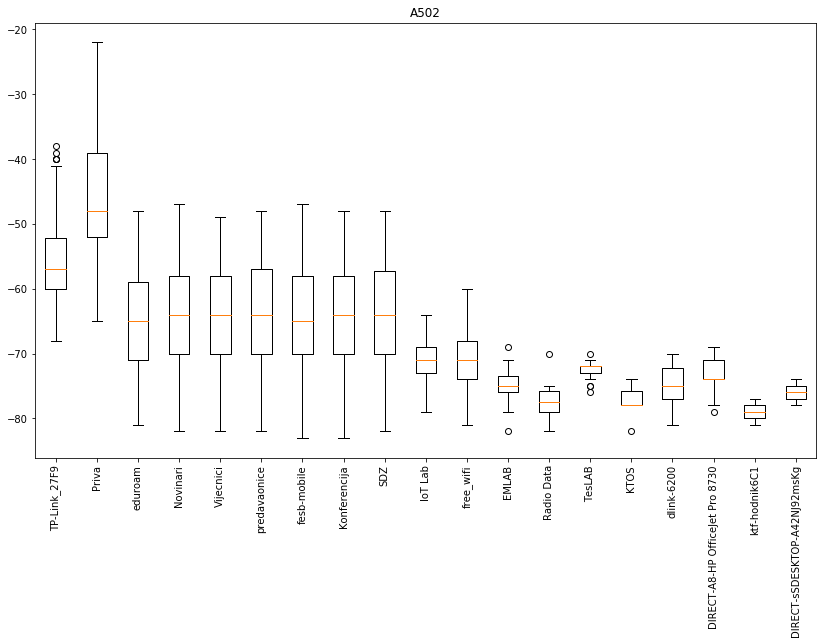

In [19]:
boxplot(a502)

In [39]:
data = pd.concat([a507, a501, a502, a503, a505, a506, a508, a509, hall]).reset_index(drop=True)

In [95]:
a502_droped = drop_least_ap(a502)
a501_droped = drop_least_ap(a501)
a503_droped = drop_least_ap(a503)
a505_droped = drop_least_ap(a505)
a506_droped = drop_least_ap(a506)
a507_droped = drop_least_ap(a507)
a508_droped = drop_least_ap(a508)
a509_droped = drop_least_ap(a509)
hall_droped = drop_least_ap(hall)
csv_list = [a501_droped,a502_droped,a503_droped,a505_droped,a506_droped,a507_droped,a508_droped,a509_droped,hall_droped]

In [96]:
smooth_signal(csv_list)

# Histograms of smoothed RSSI

**It can be seen that RSSI in neighbour rooms have different values as histograms start to separate after RSSI smoothing.**

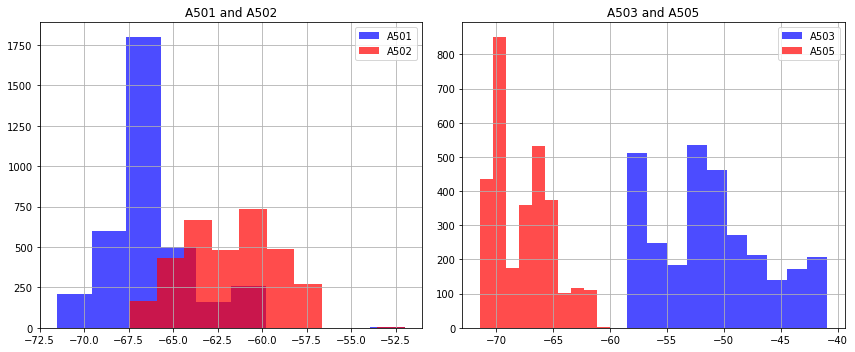

In [98]:
grouped_histogram(a501_droped, a502_droped, a503_droped, a505_droped)

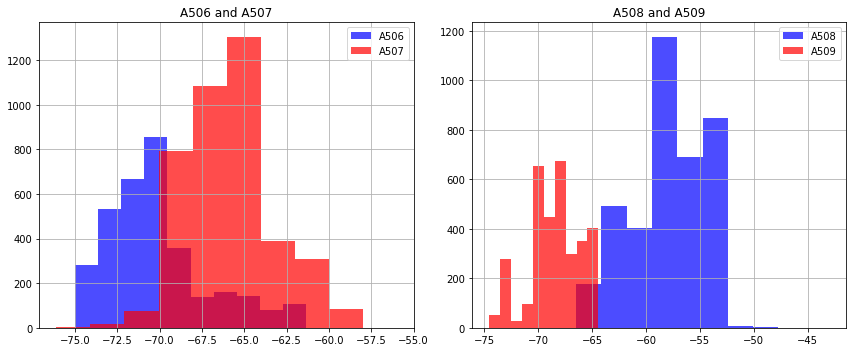

In [99]:
grouped_histogram(a506_droped, a507_droped, a508_droped, a509_droped)

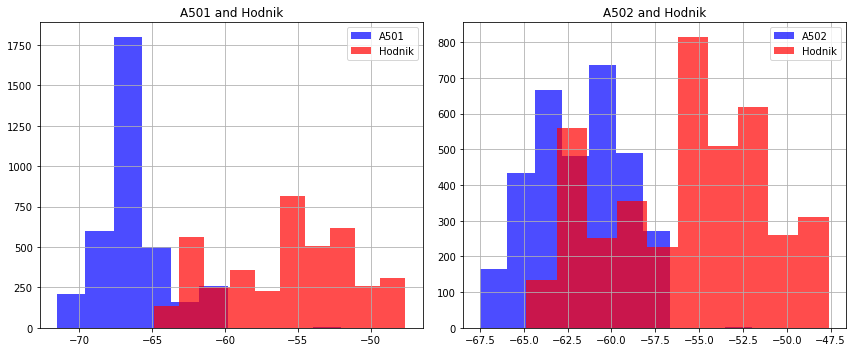

In [100]:
grouped_histogram(a501_droped, hall_droped, a502_droped, hall_droped)

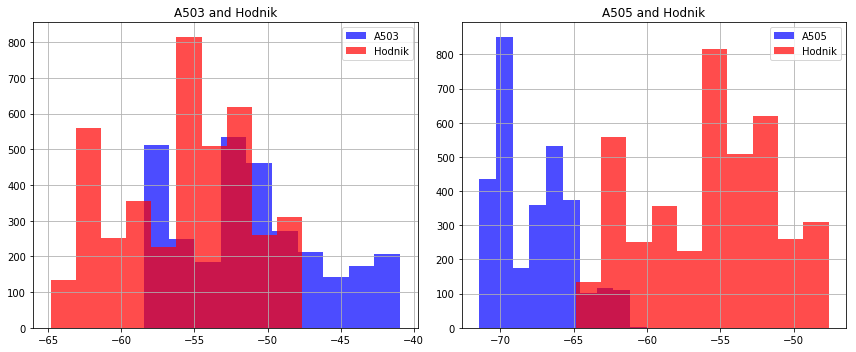

In [101]:
grouped_histogram(a503_droped, hall_droped, a505_droped, hall_droped)

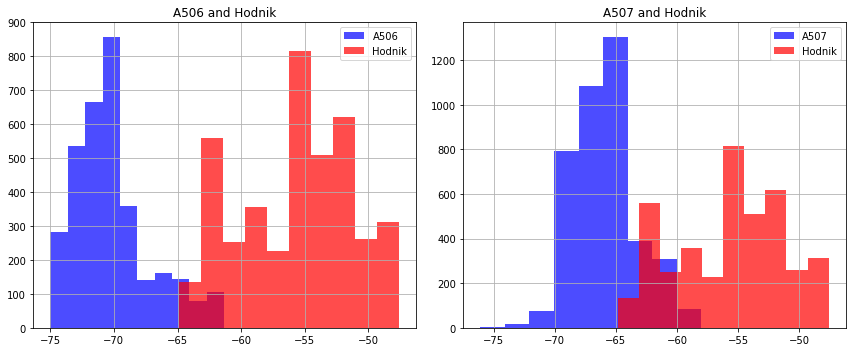

In [102]:
grouped_histogram(a506_droped, hall_droped, a507_droped, hall_droped)

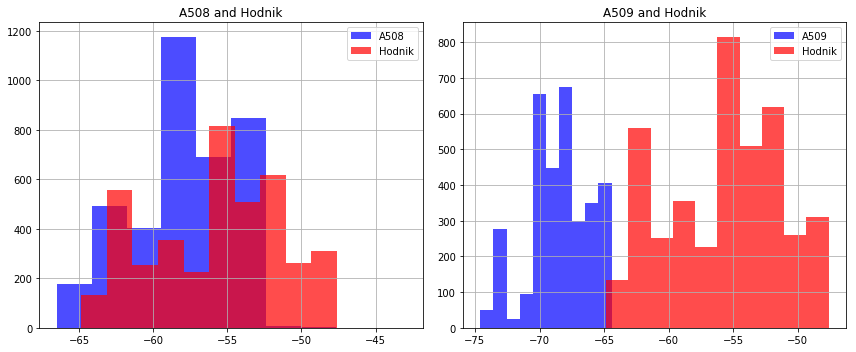

In [103]:
grouped_histogram(a508_droped, hall_droped, a509_droped, hall_droped)

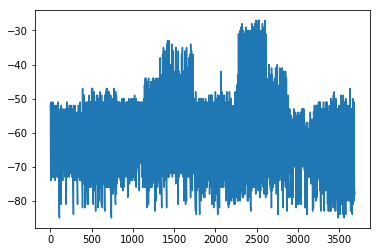

In [105]:
plt.plot(a501.rssi);

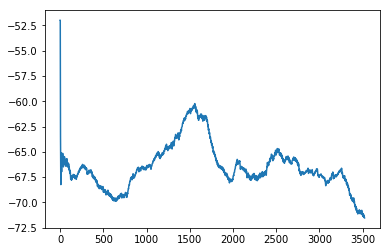

In [106]:
plt.plot(a501_droped.rssi);